<a href="https://colab.research.google.com/github/sayedmohamedscu/Cat-face-landmarks/blob/master/c1_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir .kaggle
!mkdir .s

mkdir: cannot create directory ‘.kaggle’: File exists
mkdir: cannot create directory ‘.s’: File exists


In [3]:
import json
token = {"username":"tesla2","key":"2e88d384a9e1fa7950bfae00ad07e151"} #use your own you will find repo i explain how to connect kaggle to colab
with open("/content/.s/kaggle.json", "w") as file:
    json.dump(token, file)
!ls

kaggle.json  sample_data


In [0]:
!chmod 600 /content/.s/kaggle.json

In [0]:
!cp /content/.s/kaggle.json ~/.kaggle/kaggle.json

In [8]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [9]:
!kaggle datasets download -d crawford/cat-dataset -p /content 

100% 4.03G/4.04G [01:16<00:00, 38.2MB/s]
100% 4.04G/4.04G [01:16<00:00, 56.9MB/s]


In [0]:
!unzip -qq /content/cat-dataset.zip

**change the files extension**

In [11]:
import os 
#os.rename(r'file path\OLD file name.file type',r'file path\NEW file name.file type')
for count in range(0,7):
    f='/content/CAT_0'+ str(count)
    print(f)
    for files in os.listdir(f):
        n=len(files)
        
        if files[n-1]=='t':
            dr=f+'/'+files
            new_dr=f+'/'+files[0:n-7]+'txt'
            
            os.rename(r'%s' % dr,r'%s' % new_dr)

            print (new_dr)

        


/content/CAT_00
/content/CAT_00/00000076_013.txt
/content/CAT_00/00000059_021.txt
/content/CAT_00/00000300_027.txt
/content/CAT_00/00000347_022.txt
/content/CAT_00/00000455_026.txt
/content/CAT_00/00000015_028.txt
/content/CAT_00/00000377_017.txt
/content/CAT_00/00000407_022.txt
/content/CAT_00/00000364_000.txt
/content/CAT_00/00000310_003.txt
/content/CAT_00/00000344_019.txt
/content/CAT_00/00000396_000.txt
/content/CAT_00/00000322_007.txt
/content/CAT_00/00000083_024.txt
/content/CAT_00/00000012_028.txt
/content/CAT_00/00000430_021.txt
/content/CAT_00/00000030_028.txt
/content/CAT_00/00000321_003.txt
/content/CAT_00/00000022_024.txt
/content/CAT_00/00000095_004.txt
/content/CAT_00/00000300_026.txt
/content/CAT_00/00000427_012.txt
/content/CAT_00/00000092_029.txt
/content/CAT_00/00000308_021.txt
/content/CAT_00/00000069_009.txt
/content/CAT_00/00000378_011.txt
/content/CAT_00/00000022_028.txt
/content/CAT_00/00000400_024.txt
/content/CAT_00/00000084_026.txt
/content/CAT_00/00000020_00

check the data

In [1]:
import numpy as np

f = open("/content/CAT_00/00000375_020.txt", "r")
data=f.read()

print(len(data.split()))
new_label=data.split()
new_label=np.asarray(new_label[1:5])
new_label.shape
#print(f.read())

19


(4,)

In [3]:
import os 
import cv2
import numpy as np
images=[]
labeles=[]
#os.rename(r'file path\OLD file name.file type',r'file path\NEW file name.file type')
for count in range(0,7):
    f='/content/CAT_0'+ str(count)
    print(f)
    for files in os.listdir(f):
        n=len(files)
        
        if files[n-1]=='t':
            dr=f+'/'+str(files)
            data = open("%s"%dr, "r")
            
            data=data.read()
            new_label=data.split()
            new_label=np.asarray(new_label[1:5])


            imdr=f+'/'+files[:n-3]+'jpg'
            im=cv2.imread(imdr)
            x=im.shape[1]/224
            y=im.shape[0]/224
            im=cv2.resize(im,(224,224))
            for i in range(0,4,2): 
                new_label[i]=int(new_label[i])/x
                new_label[i+1]=int(new_label[i+1])/y

            images.append(im)
            labeles.append(new_label)

            

                #cv2.circle(im,(int(new_label[i]),int(new_label[i+1])), 10, (0,0,255), -1)#x , y



            
            

            

            
            
                        


/content/CAT_00
/content/CAT_01
/content/CAT_02
/content/CAT_03
/content/CAT_04
/content/CAT_05
/content/CAT_06


In [4]:
from sklearn.utils import shuffle

images,labeles=shuffle(images,labeles,random_state=817328462)
print("ok")

ok


In [0]:
Images = np.array(images) #converting the list of images to numpy array.
Labels = np.array(labeles)
del labeles,images

In [6]:
print(Images.shape,Labels.shape)
print(Labels[9996])

(9997, 224, 224, 3) (9997, 4)
['91.' '100' '141' '102']


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Images, Labels, test_size=0.3, random_state=42)

In [0]:
y_train=y_train.astype(float)
y_test=y_test.astype(float)
X_train=X_train/255
X_test=X_test/255



Data size

In [9]:
from sys import getsizeof
getsizeof(X_train)


8425955472

In [0]:
y_train=y_train/255
y_test=y_test/255

In [14]:
import numpy as np
import cv2
im=X_train[0]

l=y_train[0]
im=im*255

cv2.imwrite('a1.jpg',im)
for i in range(0,4,2): #18 not 4 for full dataset
    i
    a1=l[i]
    a2=l[i+1]
    a1=int(a1*255)
    a2=int(a2*255)
    print(a1)
    cv2.circle(im,(a1,a2), 1, (0,0,255), -1)#x , y

    cv2.imwrite('a.jpg',im)

45
88


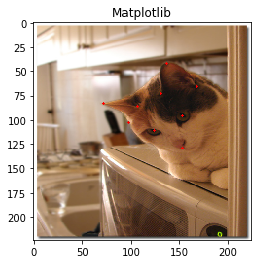

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
im=im/255
b,g,r = cv2.split(im)
frame_rgb = cv2.merge((r,g,b))
plt.imshow(frame_rgb)
plt.title('Matplotlib') #Give this plot a title, 
                        #so I know it's from matplotlib and not cv2
plt.show()


**visualization**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


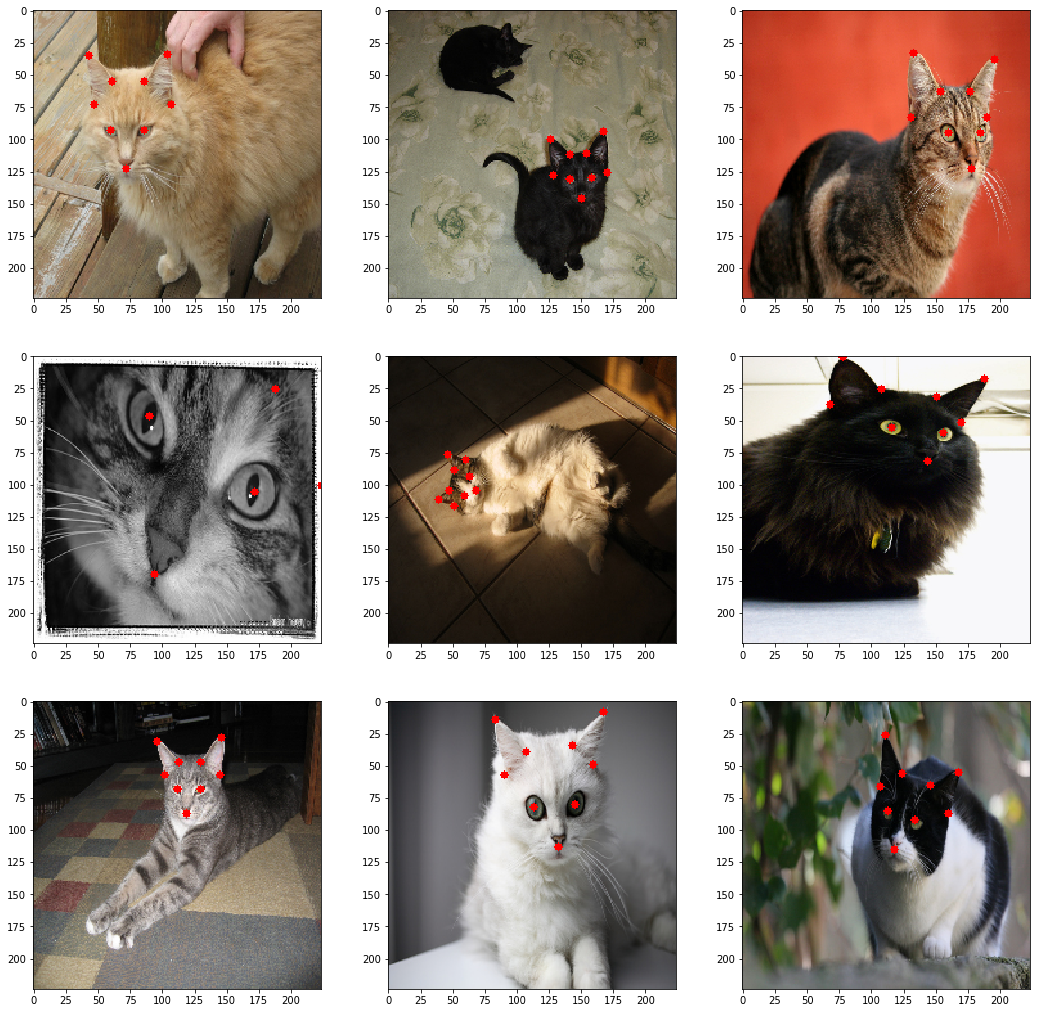

In [0]:
import numpy as np
import matplotlib.pyplot as plt
test_visua=X_train[0:100]
w=10
h=10
fig=plt.figure(figsize=(18, 18))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = test_visua[i]
    l=y_train[i]
    l=l*255
    for x in range(0,18,2): 
        
        a1=l[x]
        a2=l[x+1]
        a1=int(a1)
        a2=int(a2)
        cv2.circle(img,(a1,a2), 3, (0,0,255), -1)
    
    

    b,g,r = cv2.split(img)
    frame_rgb = cv2.merge((r,g,b))
    fig.add_subplot(rows, columns, i)
    plt.imshow(frame_rgb)
plt.show()

In [11]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224,224,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4))

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         

In [13]:
model.fit(X_train, y_train,
          batch_size=100,
          epochs=20,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
#model.save('/content/gdrive/My Drive/cat1.h5')




Train on 6997 samples, validate on 3000 samples
Epoch 1/20





6997/6997 [==============================] - 39s 6ms/step - loss: 0.0384 - acc: 0.5467 - val_loss: 0.0305 - val_acc: 0.7990
Epoch 2/20
6997/6997 [==============================] - 22s 3ms/step - loss: 0.0188 - acc: 0.7122 - val_loss: 0.0175 - val_acc: 0.7990
Epoch 3/20
6997/6997 [==============================] - 22s 3ms/step - loss: 0.0161 - acc: 0.7616 - val_loss: 0.0135 - val_acc: 0.7990
Epoch 4/20
6997/6997 [==============================] - 22s 3ms/step - loss: 0.0147 - acc: 0.7888 - val_loss: 0.0113 - val_acc: 0.7990
Epoch 5/20
6997/6997 [==============================] - 22s 3ms/step - loss: 0.0138 - acc: 0.7985 - val_loss: 0.0111 - val_acc: 0.7990
Epoch 6/20
6997/6997 [==============================] - 22s 3ms/step - loss: 0.0131 - acc: 0.8023 - val_loss: 0.0109 - val_acc: 0.7990
Epoch 7/20
6997/6997 [==============================] - 22s 3ms/step - loss: 0.0125 - acc: 0.8031 - val_loss: 0.0107 - val_acc: 0.7990

In [50]:
im1=cv2.imread('/content/a.jpg')
#im = cv2.cvtColor(im1,cv2.COLOR_BGR2RGB)
im=cv2.resize(im1,(224,224))
q=im

im=im.reshape(1,224,224,3)
im = np.array(im)
im=im/255
predictions = model.predict(im)
#print(predictions)
predictions=(predictions*255)
print((predictions))
predictions=predictions.reshape(4)
import numpy as np
import cv2

l=predictions
l=l+1
im=q

cv2.imwrite('a1.jpg',im)
for i in range(0,4,2): #18 not 4 for full dataset
    i
    a1=l[i]
    a2=l[i+1]
    a1=int(a1)
    a2=int(a2)
    print(a1)
    cv2.circle(im,(a1,a2), 3, (0,0,255), -1)#x , y

cv2.imwrite('a3.jpg',im)
#cv2.imwrite('/content/imue.jpg',predictions)
#q[:,:,0]=predictions[:,:,0]
#q[:,:,2]=predictions[:,:,0]
#cv2.imwrite('/content/colores.jpg',q)


[[ 76.519196  74.652504 102.34023   73.63255 ]]
77
103


True

In [35]:
import keras, datetime
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from keras.applications import MobileNetV2
import numpy as np

inputs = Input(shape=(224, 224, 3))
mobilenetv2_model = MobileNetV2( input_tensor= inputs , include_top=False, weights='imagenet')

net = Dense(128, activation='relu')(mobilenetv2_model.layers[-1].output)
net = Flatten()(net)

net = Dense(64, activation='relu')(net)
net = Dense(4, activation='linear')(net)

model = Model(inputs=inputs, outputs=net)

#model.summary()

# training


/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [36]:
len(model.layers[:])

159

In [38]:
for layer in model.layers[:145]:

    layer.trainable=False
for layer in model.layers[145:]:
    layer.trainable=True
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [39]:
model.compile(optimizer=keras.optimizers.SGD(), loss='mse',metrics=['accuracy'])

h=model.fit(X_train, y_train,
          batch_size=100,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 6997 samples, validate on 3000 samples
Epoch 1/10
6997/6997 [==============================] - 21s 3ms/step - loss: 0.3254 - acc: 0.3679 - val_loss: 0.0252 - val_acc: 0.6787
Epoch 2/10
6997/6997 [==============================] - 14s 2ms/step - loss: 0.0204 - acc: 0.7227 - val_loss: 0.0183 - val_acc: 0.7463
Epoch 3/10
6997/6997 [==============================] - 14s 2ms/step - loss: 0.0161 - acc: 0.7683 - val_loss: 0.0160 - val_acc: 0.7650
Epoch 4/10
6997/6997 [==============================] - 14s 2ms/step - loss: 0.0143 - acc: 0.7818 - val_loss: 0.0148 - val_acc: 0.7713
Epoch 5/10
6997/6997 [==============================] - 14s 2ms/step - loss: 0.0132 - acc: 0.7871 - val_loss: 0.0143 - val_acc: 0.7760
Epoch 6/10
6997/6997 [==============================] - 14s 2ms/step - loss: 0.0124 - acc: 0.7918 - val_loss: 0.0139 - val_acc: 0.7787
Epoch 7/10
6997/6997 [==============================] - 14s 2ms/step - loss: 0.0120 - acc: 0.7949 - val_loss: 0.0131 - val_acc: 0.7817
Epoch 8